# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor,Ridge,Lasso,ElasticNet
import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.model_selection import KFold


# 2. Collect and load data

In [28]:
df=pd.read_csv('bigcity.csv')
df=df.set_index('Unnamed: 0')
df.head()

,u,x
Unnamed: 0,,
1,138,143
2,93,104
3,61,69
4,179,260
5,48,75


# 3. Explore numeric variables - five number summary

In [29]:
df.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

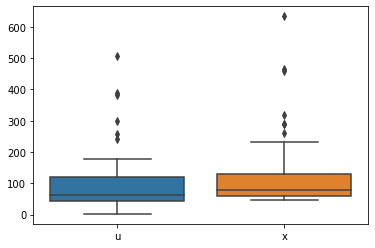

In [44]:
sns.boxplot(data=df)
plt.show()

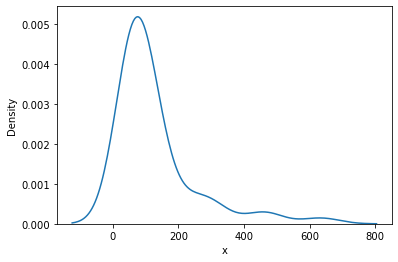

Mean of x:  127.79591836734694
Median of x:  79.0
Variance of x:  15158.832482993197
STD of x:  123.12121053252034


In [56]:
sns.kdeplot(df['x'])
plt.show()
print('Mean of x: ',df['x'].mean())
print('Median of x: ',df['x'].median())
print('Variance of x: ',df['x'].var())
print('STD of x: ',df['x'].std())

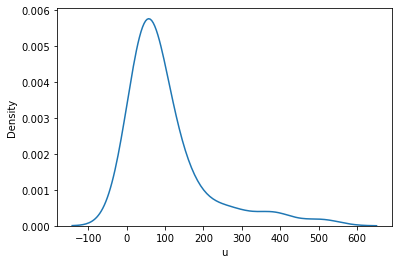

Mean of u:  103.14285714285714
Median of u:  64.0
Variance of u:  10900.416666666662
STD of u:  104.40506054146351


In [55]:
sns.kdeplot(df['u'])
plt.show()
print('Mean of u: ',df['u'].mean())
print('Median of u: ',df['u'].median())
print('Variance of u: ',df['u'].var())
print('STD of u: ',df['u'].std())

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

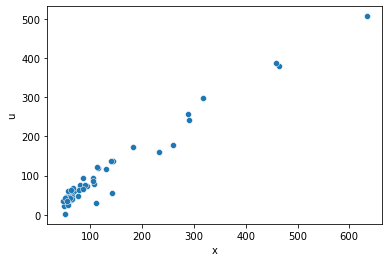

In [59]:
sns.scatterplot(data=df,x='x',y='u')
plt.show()

In [60]:
pd.crosstab(df['u'],df['x'])

x,46,48,50,52,53,54,57,58,60,61,...,143,183,232,260,288,291,317,459,464,634
u,,,,,,,,,,,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [61]:
df.shape

(49, 2)

In [62]:
X=df['u']
y=df['x']
X=sm.add_constant(X)


D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [63]:
df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


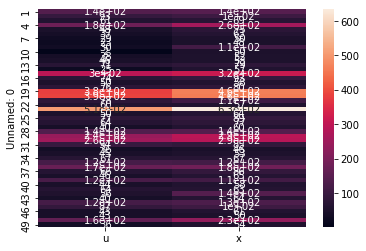

In [65]:
sns.heatmap(df,annot=True)
plt.show()

In [67]:
df.isnull().sum()/df.shape[1]*100

u    0.0
x    0.0
dtype: float64

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [86]:
print(len(X_train))
print(len(y_train))

39
39


In [87]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)


In [88]:
lr_model.coef_

array([0.        , 1.15945123])

In [89]:
lr_model.intercept_

9.718455322828262

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

In [90]:
y_pred=lr_model.predict(X_test)
y_pred

array([167.40382318, 148.85260343,  60.73430963,  51.45869975,
        80.44498061, 217.26022625,  56.09650469, 306.53797128,
        59.57485839, 118.70687134])

In [91]:
r2=r2_score(y_test,y_pred)
print('R2: ',r2)

R2:  0.9181922560396981


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


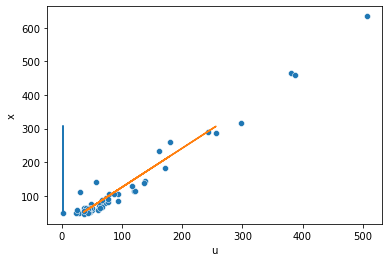

In [98]:
sns.scatterplot(df['u'],df['x'])
plt.plot(X_test,y_pred)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


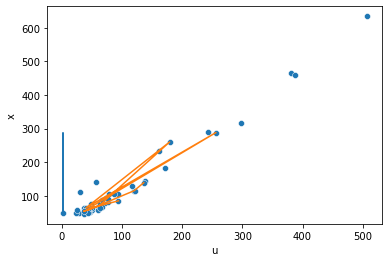

In [99]:
sns.scatterplot(df['u'],df['x'])
plt.plot(X_test,y_test)
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [101]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error


In [112]:
y_train_test=lr.predict(X_train)
y_test_test=lr.predict(X_test)
print('R2 train: ',r2_score(y_train,y_train_test))
print('R2 test: ',r2_score(y_test,y_test_test))

R2 train:  0.9682175540860046
R2 test:  0.9181922560396981


In [111]:
print('mse train: ',mean_squared_error(y_train,y_train_test))
print('mse test: ',mean_squared_error(y_test,y_test_test))

mse train:  537.7499996894286
mse test:  546.869224903266


In [110]:
print('RMSE train: ',np.sqrt(mean_squared_error(y_train,y_train_test)))
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_test_test)))

RMSE train:  23.18943724391406
RMSE test:  23.385235190249123


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [114]:
y_train_test=lr.predict(X_train)
y_test_test=lr.predict(X_test)
print('R2 train: ',r2_score(y_train,y_train_test))
print('R2 test: ',r2_score(y_test,y_test_test))

R2 train:  0.9682175540860046
R2 test:  0.9181922560396981
